In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score


In [2]:
dataset = pd.read_csv('credit_rating.csv')
dataset.drop(columns='S.No',inplace=True)
selected=['CHK_ACCT','Duration','Balance in Savings A/C','History','Credit Amount','Purpose of credit','Duration','Age','Install_rate','Real Estate','Credit classification']
dataset=dataset[selected]
dataset = dataset.loc[:, ~dataset.columns.duplicated()]
dataset.head()

,CHK_ACCT,Duration,Balance in Savings A/C,History,Credit Amount,Purpose of credit,Age,Install_rate,Real Estate,Credit classification
0,0DM,6,unknown,critical,1169,radio-tv,67,4,real-estate,good.
1,less-200DM,48,less100DM,duly-till-now,5951,radio-tv,22,2,real-estate,bad.
2,no-account,12,less100DM,critical,2096,education,49,2,real-estate,good.
3,0DM,42,less100DM,duly-till-now,7882,furniture,45,2,building-society,good.
4,0DM,24,less100DM,delay,4870,new-car,53,3,none,bad.


In [3]:
dataset.columns

Index(['CHK_ACCT', 'Duration', 'Balance in Savings A/C', 'History',
       'Credit Amount', 'Purpose of credit', 'Age', 'Install_rate',
       'Real Estate', 'Credit classification'],
      dtype='object')

In [4]:
encoder = LabelEncoder()
categorical_columns = dataset.select_dtypes(include=['object']).columns.tolist()
for ft in categorical_columns:
    dataset[ft]=encoder.fit_transform(dataset[ft])


In [5]:
dataset.isna().sum()


CHK_ACCT                  0
Duration                  0
Balance in Savings A/C    0
History                   0
Credit Amount             0
Purpose of credit         0
Age                       0
Install_rate              0
Real Estate               0
Credit classification     0
dtype: int64

In [6]:
dataset.isnull().sum()

CHK_ACCT                  0
Duration                  0
Balance in Savings A/C    0
History                   0
Credit Amount             0
Purpose of credit         0
Age                       0
Install_rate              0
Real Estate               0
Credit classification     0
dtype: int64

In [7]:
class_count = dataset['Credit classification'].value_counts()


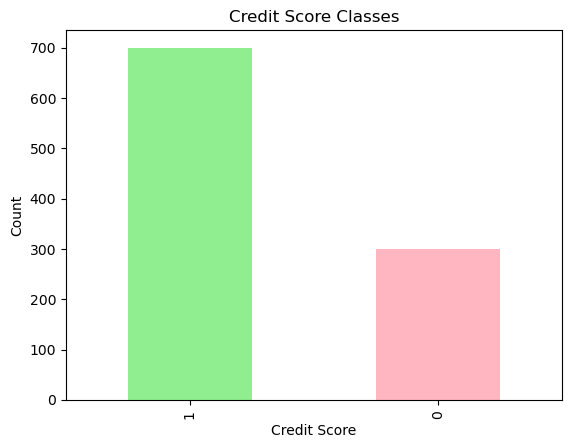

In [8]:
colors=['lightgreen','lightpink']
class_count.plot(kind="bar",color=colors[:len(class_count)])
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.title("Credit Score Classes")
plt.show()

In [9]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [11]:
sc = MinMaxScaler()
X_train_std = sc.fit_transform(x_train)
X_test_std = sc.fit_transform(x_test)

In [12]:
rf = RandomForestClassifier(random_state=45)
rf.fit(X_train_std, y_train)
# Predict
y_pred = rf.predict(X_test_std)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [13]:
print('Accuracy: ',accuracy)
print(f'Precision: {precision:.2f}')
print('Recall: ',recall)
print(f'F1 - score: {f1:.2f}')

Accuracy:  0.72
Precision: 0.71
Recall:  0.72
F1 - score: 0.71


Confusion matrix, without normalization
Normalized confusion matrix


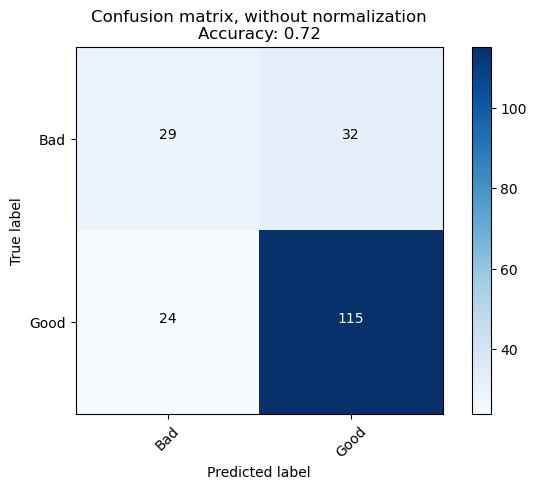

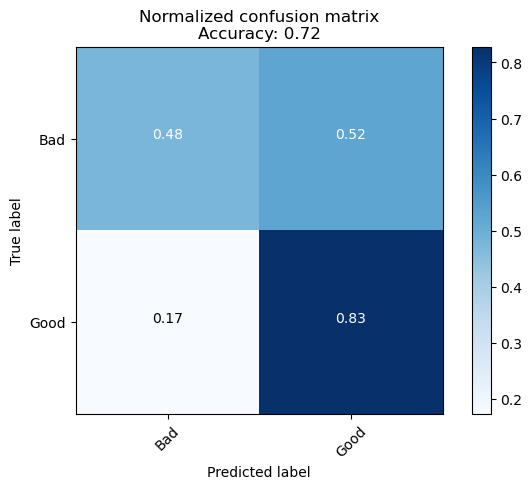

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming y_true contains the true labels and y_pred contains the predicted labels

def plot_confusion_matrix(cm, classes, acc, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title + '\nAccuracy: {:.2f}'.format(acc))
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Define the class labels
class_names = ['Bad', 'Good']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, acc=accuracy, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=class_names, acc=accuracy, normalize=True, title='Normalized confusion matrix')

plt.show()


In [15]:
import joblib
from flask import Flask, render_template, request
joblib.dump(rf, 'randomForest.joblib')

['randomForest.joblib']

In [35]:
def make_prediction(chkacct, duration, balanceInSavings, history,creditAmount, purposeofcredit, age, install_rate,RealEstate):
    model = joblib.load('randomForest.joblib')
    inputAttri = [[chkacct,duration, balanceInSavings,history,creditAmount, purposeofcredit, age, install_rate,RealEstate]]
    inputAttri=sc.transform(inputAttri)
    prediction = model.predict(inputAttri)
    if prediction[0] == 1:
        return 'GOOD'
    else:
        return 'BAD'

In [17]:
make_prediction(1,   2,    9,    4, 6,    6,   22,    1,    3)

'GOOD'

In [37]:
from flask import Flask, render_template, request, jsonify

app = Flask(__name__, static_url_path='/static')

@app.route('/', methods=['GET', 'POST'])
def index():
    if request.method == 'POST':
        # Get form data
        data = request.get_json()
        chkacct = int(data['chkacct'])
        duration = int(data['duration'])
        balanceInSavings = int(data['balanceInSavings'])
        history = int(data['history'])
        creditAmount = int(data['creditAmount'])
        purposeofcredit = int(data['purposeofcredit'])
        age = int(data['age'])
        install_rate = int(data['install_rate'])
        RealEstate = int(data['RealEstate'])
        
        # Call your prediction function
        result = make_prediction(chkacct, duration, balanceInSavings, history, creditAmount, purposeofcredit, age, install_rate, RealEstate)
        
        return jsonify({'prediction': result})
    
    return render_template('form.html')

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [11/Jun/2024 10:35:26] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [11/Jun/2024 10:35:27] "GET /static/wallpaperflare.com_wallpaper.jpg HTTP/1.1" 304 -
127.0.0.1 - - [11/Jun/2024 10:35:51] "POST / HTTP/1.1" 200 -
